# 下載Yelp資料集

In [3]:
import os
import urllib.request


__all__ = ["download"]


def download_files(bucket_path, file_list, download_path):
    """
    Provide path to s3 bucket, download a file list to download path
    """
    if not os.path.isdir(download_path):
        os.makedirs(download_path)
    for f in file_list:
        # check if file already exists
        file_path = os.path.join(download_path, f)
        if os.path.isfile(file_path):
            print ('File "%s" already exists' %f)
        else:
            print ('Downloading "%s" ...' % f)
            urllib.request.urlretrieve(bucket_path + f, file_path)
            print ('Done')


def download(file_list=[]):
    """
    Downloads files from AWS S3 repository
    Here are all avialble dataset from the repository
    file_list=["yelp_academic_dataset_business.pickle"
               "yelp_academic_dataset_review.pickle",
               "yelp_academic_dataset_user.pickle",
               "yelp_academic_dataset_checkin.pickle",
               "yelp_academic_dataset_tip.pickle"]
    """
    if file_list == []:
        print ("Providiing empty file_list, no download...")
    else:
        bucket_path = "https://s3-us-west-2.amazonaws.com/science-of-science-bucket/yelp_academic_dataset/"
        current_path = os.path.dirname(os.path.abspath("/"))
        download_path = "/Users/M0744018/Documents/Yelp Analysis"
        download_files(bucket_path, file_list, download_path)


In [2]:
download(file_list=["yelp_academic_dataset_business.pickle",
                              "yelp_academic_dataset_review.pickle",
                              "yelp_academic_dataset_user.pickle",
                              "yelp_academic_dataset_checkin.pickle",
                              "yelp_academic_dataset_tip.pickle"])

Done
Done
Done
Done
Done


# 讀取Yelp的資料

In [1]:
import os
import urllib.request
import pandas as pd
review = pd.read_pickle('/Users/M0744018/Documents/Yelp Analysis/yelp_academic_dataset_business.pickle')
out = review.to_json(orient='records')[1:-1].replace('},{', '} {')

In [6]:
data = []
for i in review.index:
    d = {}
    for j in review.columns:
        d[j] = review[j][i]
    data.append(d)
len(data)

61184

In [8]:
review.columns

Index(['attributes', 'business_id', 'categories', 'city', 'full_address',
       'hours', 'latitude', 'longitude', 'name', 'neighborhoods', 'open',
       'review_count', 'stars', 'state', 'type'],
      dtype='object')

In [5]:
review['attributes']

0                            {'By Appointment Only': True}
1        {'Happy Hour': True, 'Accepts Credit Cards': T...
2                                  {'Good for Kids': True}
3                                                       {}
4        {'Alcohol': 'full_bar', 'Noise Level': 'averag...
5        {'Alcohol': 'full_bar', 'Noise Level': 'loud',...
6                                                       {}
7                                  {'Good for Kids': True}
8                                                       {}
9        {'Take-out': True, 'Drive-Thru': False, 'Outdo...
10       {'Price Range': 3, 'Accepts Credit Cards': Tru...
11       {'Alcohol': 'full_bar', 'Noise Level': 'averag...
12       {'Alcohol': 'none', 'Noise Level': 'average', ...
13       {'Take-out': True, 'Price Range': 1, 'Outdoor ...
14       {'Accepts Credit Cards': True, 'Wi-Fi': 'free'...
15       {'Take-out': True, 'Price Range': 2, 'Outdoor ...
16                                                      

In [10]:
json_data = review.to_json(orient='records')

In [1]:
import elasticsearch

1. 建立index
2. 讀取每筆pandas資料
3. 寫入elastcsearch

1. 從elasticsearch抓資料出來查詢, by 關鍵字
2. 從elasticsearch透過2-layer aggregation進行分析

1. 畫一張heatmap來分析
2. 畫一張histogram分析

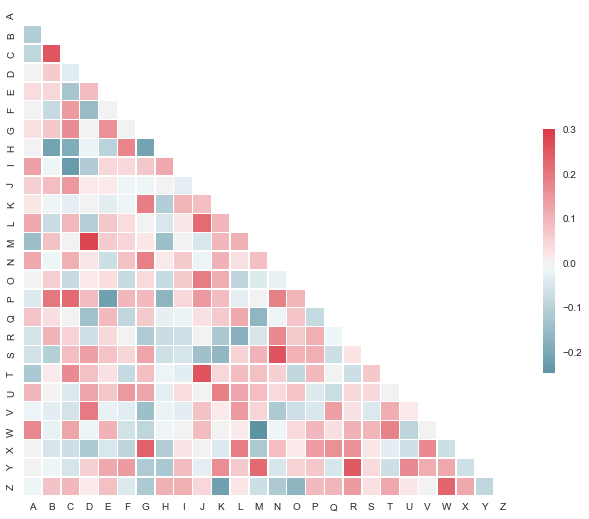

In [27]:
%matplotlib inline
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})